# Assignment 6


##Assignmnet 6 
create a convolution neural network using the Fashion MNIST network

In [2]:
from sklearn.datasets import load_sample_images
import tensorflow as tf
import numpy as np


In [3]:
cifar10 = tf.keras.datasets.cifar10.load_data()
(X_train_full, y_train_full), (X_test, y_test) = cifar10
X_train_full = np.expand_dims(X_train_full, axis=-1).astype(np.float32) / 255
X_test = np.expand_dims(X_test.astype(np.float32), axis=-1) / 255
X_train, X_valid = X_train_full[:-5000], X_train_full[-5000:]
y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]
y_train

array([[6],
       [9],
       [9],
       ...,
       [1],
       [5],
       [6]], dtype=uint8)

In [4]:
class_names = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
class_names[y_train[0][0]]

'frog'

In [5]:
from functools import partial
DefaultConv2D = partial(tf.keras.layers.Conv2D, kernel_size=3, padding="same", activation="relu", kernel_initializer="he_normal")

model = tf.keras.Sequential([
    DefaultConv2D(filters=32, input_shape=[32, 32, 3]),
    tf.keras.layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=32),
    tf.keras.layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=64),
    tf.keras.layers.MaxPooling2D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=64, activation="relu", kernel_initializer="he_normal"),
    tf.keras.layers.Dense(units=10, activation="softmax")
])

Metal device set to: Apple M2 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



In [6]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])


In [7]:
import time
start_time = time.time()
start_cpu_time = time.process_time()
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

end_time = time.time()
end_cpu_time = time.process_time()

wall_time = end_time - start_time
cpu_time = end_cpu_time - start_cpu_time

print("Wall time:", wall_time)
print("CPU time:", cpu_time)

Epoch 1/10


2023-04-16 21:12:16.870322: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1407/1407 [==============================] - 19s 13ms/step - loss: 1.4110 - accuracy: 0.4901 - val_loss: 1.1472 - val_accuracy: 0.5928
Epoch 2/10
1407/1407 [==============================] - 19s 13ms/step - loss: 1.0173 - accuracy: 0.6415 - val_loss: 0.9966 - val_accuracy: 0.6582
Epoch 3/10
1407/1407 [==============================] - 18s 13ms/step - loss: 0.8553 - accuracy: 0.7003 - val_loss: 1.0425 - val_accuracy: 0.6318
Epoch 4/10
1407/1407 [==============================] - 17s 12ms/step - loss: 0.7583 - accuracy: 0.7355 - val_loss: 0.8188 - val_accuracy: 0.7238
Epoch 5/10
1407/1407 [==============================] - 18s 13ms/step - loss: 0.6883 - accuracy: 0.7599 - val_loss: 0.8697 - val_accuracy: 0.7168
Epoch 6/10
1407/1407 [==============================] - 18s 13ms/step - loss: 0.6270 - accuracy: 0.7799 - val_loss: 0.8146 - val_accuracy: 0.7294
Epoch 7/10
1407/1407 [==============================] - 18s 13ms/step - loss: 0.5788 - accuracy: 0.7963 - val_loss: 0.8647 - val_accura

In [8]:
score = model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.9169 - accuracy: 0.7080


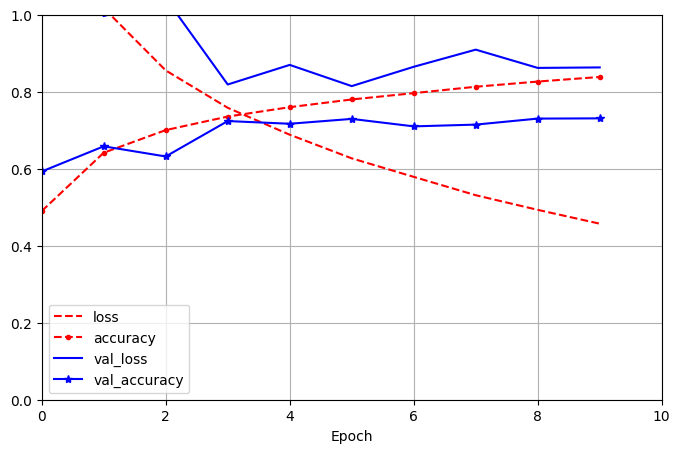

In [9]:
import matplotlib.pyplot as plt
import pandas as pd

pd.DataFrame(history.history).plot(
    figsize=(8, 5), xlim=[0, 10], ylim=[0, 1], grid=True, xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"])
plt.show()

In [10]:
y_proba2 = model.predict(X_test)
y_proba2.round(2)

313/313 [==============================] - 1s 2ms/step


array([[0.04, 0.  , 0.  , ..., 0.  , 0.01, 0.  ],
       [0.  , 0.01, 0.  , ..., 0.  , 0.99, 0.  ],
       [0.02, 0.04, 0.  , ..., 0.01, 0.91, 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.01, 0.04, 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.96, 0.  , 0.  ]], dtype=float32)

In [11]:
import numpy as np
y_pred2 = y_proba2.argmax(axis=-1)
y_pred2

array([3, 8, 8, ..., 5, 5, 7])

In [12]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score, precision_score,recall_score
precision = precision_score(y_test, y_pred2, average= None)
recall = recall_score(y_test, y_pred2, average= None)
accuracy = accuracy_score(y_test,y_pred2)
print("Precision Score: ",precision, "\nRecall Score", recall,"\nAccuracy Score",accuracy)

Precision Score:  [0.74803922 0.7605042  0.68       0.54161641 0.64667291 0.49422336
 0.81461287 0.85788114 0.80720545 0.8852459 ] 
Recall Score [0.763 0.905 0.561 0.449 0.69  0.77  0.747 0.664 0.829 0.702] 
Accuracy Score 0.708


In [13]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred2, target_names=class_names))

              precision    recall  f1-score   support

    airplane       0.75      0.76      0.76      1000
  automobile       0.76      0.91      0.83      1000
        bird       0.68      0.56      0.61      1000
         cat       0.54      0.45      0.49      1000
        deer       0.65      0.69      0.67      1000
         dog       0.49      0.77      0.60      1000
        frog       0.81      0.75      0.78      1000
       horse       0.86      0.66      0.75      1000
        ship       0.81      0.83      0.82      1000
       truck       0.89      0.70      0.78      1000

    accuracy                           0.71     10000
   macro avg       0.72      0.71      0.71     10000
weighted avg       0.72      0.71      0.71     10000

